<a href="https://colab.research.google.com/github/HarshESC/TalkData-Mobile-Demographics/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#EDA Imports
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Final Capstone"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Final Capstone


In [2]:
# Reading each data file
# Reducing the file data size by 30% for memory
app_events = pd.read_csv("app_events.csv", nrows=19483840)
app_labels = pd.read_csv("app_labels.csv", nrows=275966)
events = pd.read_csv("events.csv", nrows=1951770)
gender_age_train = pd.read_csv("gender_age_train.csv", nrows=44787)
gender_age_test = pd.read_csv("gender_age_test.csv", nrows=67243)
category_labels = pd.read_csv("label_categories.csv", nrows=558)
phone_brand = pd.read_csv("phone_brand_device_model.csv", nrows=112347)


## Let's Take a look at the Datasets

In [3]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [4]:
app_labels.head()


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [5]:
category_labels.head()


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [6]:
phone_brand.head()


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


### Exploratory Data Analysis

Merging Datasets together

In [7]:
# Merging app_events and event_id through event_id column
merged_events = pd.merge(app_events, events, on="event_id")


In [8]:
# Merging app_labels and category_labels through label_id
merged_apps = pd.merge(app_labels, category_labels, on="label_id")


In [9]:
# Merging previous merged data tables together to make larger data frame
merged_events_apps = pd.merge(merged_events, merged_apps, on="app_id")


In [10]:
# Adding phone brand to merged_events_apps through device_id merge
merged_events_apps_brands = pd.merge(merged_events_apps, phone_brand, on="device_id")


In [11]:
# Creating final data frame by merging gender and age with previous dataframe
final_df = pd.merge(merged_events_apps_brands, gender_age_train, on="device_id")
final_df.tail()


,event_id,app_id,is_installed,is_active,device_id,timestamp,longitude,latitude,label_id,category,phone_brand,device_model,gender,age,group
4516274,1644253,34559227754570733,1,1,-5611908785796903499,2016-05-02 11:52:09,0.0,0.0,302,unknown,金立,F103S,M,26,M23-26
4516275,1644253,34559227754570733,1,1,-5611908785796903499,2016-05-02 11:52:09,0.0,0.0,306,unknown,金立,F103S,M,26,M23-26
4516276,1874484,34559227754570733,1,1,-5611908785796903499,2016-05-02 09:07:01,0.0,0.0,302,unknown,金立,F103S,M,26,M23-26
4516277,1874484,34559227754570733,1,1,-5611908785796903499,2016-05-02 09:07:01,0.0,0.0,306,unknown,金立,F103S,M,26,M23-26
4516278,1313077,-626198893166693462,1,1,8160655655365676139,2016-05-04 13:37:09,0.0,0.0,548,Industry tag,LG,P880,M,29,M29-31


# Translate Chinese Phone Brands into English

In [12]:
to_english = {
    "华为": "huawei",  # manually translated and entered
    "小米": "xiaomi",  # manually translated and entered
    "魅族": "meizu",  # manually translated and entered
    "vivo": "vivo",  # manually translated and entered
    "酷派": "coolpad",  # manually translated and entered
    "索尼": "sony",  # manually translated and entered
    "OPPO": "oppo",  # manually translated and entered
    "LG": "lg",  # manually translated and entered
    "HTC": "htc",  # manually translated and entered
    "金立": "gionee",  # manually translated and entered
    "中兴": "zte",  # manually translated and entered
    "奇酷": "qiku",  # manually translated and entered
    "TCL": "tcl",  # manually translated and entered
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
}


In [13]:
# Created new column for phone brand, can now drop old phone_brand column
final_df["english_phone_brand"] = final_df["phone_brand"].map(to_english)
master_df = final_df.drop(columns=["phone_brand"])


# Let's finally take a look at the combined final DF

### Check for Nulls

In [14]:
# Checking for missing values
# For the english_phone_brand column it appears less than 1% of data is missing, so drop the missing data
master_df.isna().mean()


event_id               0.00000
app_id                 0.00000
is_installed           0.00000
is_active              0.00000
device_id              0.00000
timestamp              0.00000
longitude              0.00000
latitude               0.00000
label_id               0.00000
category               0.00000
device_model           0.00000
gender                 0.00000
age                    0.00000
group                  0.00000
english_phone_brand    0.00656
dtype: float64

In [15]:
# drop nulls
master_df = final_df.dropna()


In [16]:
# Check the shape
master_df.shape


(4486652, 16)

In [17]:
# Checking data types of each column
# timestamp is an object type,
# convert timestamp to datetime type
master_df.dtypes


event_id                 int64
app_id                   int64
is_installed             int64
is_active                int64
device_id                int64
timestamp               object
longitude              float64
latitude               float64
label_id                 int64
category                object
phone_brand             object
device_model            object
gender                  object
age                      int64
group                   object
english_phone_brand     object
dtype: object

In [18]:
master_df["timestamp"] = pd.to_datetime(master_df["timestamp"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Checking for Sufficient Amount of Values


In [21]:
# pd.set_option("display.max_rows", None)


In [ ]:
# Only want to keep event_id with enough data,
# Drop event_id rows with < 100 values
master_df["event_id"].value_counts()


In [23]:
count = master_df["event_id"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["event_id"].isin(keep)]


In [ ]:
# Only want to keep app_id values with enough data,
# Drop app_id rows with < 1000 values
master_df["app_id"].value_counts()


In [28]:
count = master_df["app_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["app_id"].isin(keep)]


In [30]:
# Appears to be enough information for each value
# Will leave this column alone.
master_df["is_active"].value_counts()


0    1233026
1     211574
Name: is_active, dtype: int64

In [ ]:
# Only want to keep device_id values with enough data,
# Drop device_id rows with < 1000 values
master_df["device_id"].value_counts()


In [32]:
count = master_df["device_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["device_id"].isin(keep)]


In [ ]:
# Only want to keep timestamp values with enough data,
# Drop timestamp rows with < 100 values
master_df["timestamp"].value_counts()


In [35]:
count = master_df["timestamp"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["timestamp"].isin(keep)]


In [ ]:
# Only want to keep longitude values with enough data,
# Drop longitude rows with < 10000 values
master_df["longitude"].value_counts()


In [37]:
count = master_df["longitude"].value_counts()
keep = count[count >= 10000].index
master_df = master_df[master_df["longitude"].isin(keep)]


In [ ]:
# Only want to keep latitude values with enough data,
# Drop latitude rows with < 10000 values
master_df["latitude"].value_counts()


In [39]:
count = master_df["latitude"].value_counts()
keep = count[count >= 10000].index
master_df = master_df[master_df["latitude"].isin(keep)]


In [ ]:
# Only want to keep label_id values with enough data,
# Drop label_id rows with < 1000 values
master_df["label_id"].value_counts()


In [41]:
count = master_df["label_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["label_id"].isin(keep)]


In [ ]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
master_df["category"].value_counts()


In [ ]:
# Only want to keep device_model values with enough data,
# Drop device_model rows with < 1000 values
master_df["device_model"].value_counts()


In [45]:
count = master_df["device_model"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["device_model"].isin(keep)]


In [46]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
master_df["gender"].value_counts()


M    409565
F     93542
Name: gender, dtype: int64

In [ ]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
master_df["age"].value_counts()


In [48]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
master_df["group"].value_counts()


M39+      111331
M32-38    104804
M23-26     91564
M29-31     43598
F33-42     38566
M27-28     36260
F43+       23902
M22-       22008
F29-32     10591
F27-28      9779
F24-26      5812
F23-        4892
Name: group, dtype: int64

In [49]:
# There seems to be sufficient data for each of the values,
# Will leave this column alone
master_df["english_phone_brand"].value_counts()


huawei     244704
xiaomi      79717
samsung     50559
meizu       45842
coolpad     18045
oppo        16736
lshi         8070
lenovo       5783
nubia        4886
vivo         4404
hammer       4242
oneplus      4194
asus         3200
htc          3170
aiyouni      3164
qiku         2526
lg           2190
zte          1675
Name: english_phone_brand, dtype: int64

In [50]:
master_df.head()


,event_id,app_id,is_installed,is_active,device_id,timestamp,longitude,latitude,label_id,category,phone_brand,device_model,gender,age,group,english_phone_brand
3211,198,5927333115845830913,1,0,6984152891252102027,2016-05-02 00:17:01,0.0,0.0,549,Property Industry 1.0,小米,MI 4,M,36,M32-38,xiaomi
3212,198,5927333115845830913,1,0,6984152891252102027,2016-05-02 00:17:01,0.0,0.0,548,Industry tag,小米,MI 4,M,36,M32-38,xiaomi
3213,59288,5927333115845830913,1,1,6984152891252102027,2016-05-04 21:19:31,0.0,0.0,549,Property Industry 1.0,小米,MI 4,M,36,M32-38,xiaomi
3214,59288,5927333115845830913,1,1,6984152891252102027,2016-05-04 21:19:31,0.0,0.0,548,Industry tag,小米,MI 4,M,36,M32-38,xiaomi
3215,214667,5927333115845830913,1,1,6984152891252102027,2016-05-01 01:19:10,0.0,0.0,549,Property Industry 1.0,小米,MI 4,M,36,M32-38,xiaomi


In [51]:
# Since is_installed only have one unique value this column will be dropped.
# Getting rid of category column and using label_id to identify category
master_df = master_df.drop(
    columns=["is_installed", "timestamp", "latitude", "longitude", "category", 'phone_brand']
)
master_df.head()


,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand
3211,198,5927333115845830913,0,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi
3212,198,5927333115845830913,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi
3213,59288,5927333115845830913,1,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi
3214,59288,5927333115845830913,1,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi
3215,214667,5927333115845830913,1,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi


In [52]:
# Gets rid of duplicate rows and adds count as size
master_df = master_df.groupby(master_df.columns.tolist(), as_index=False).size()
master_df.head()


,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand,size
0,198,-8807740666788515175,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1
1,198,-8807740666788515175,0,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi,1
2,198,-7415261454408512527,0,6984152891252102027,254,MI 4,M,36,M32-38,xiaomi,1
3,198,-7415261454408512527,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1
4,198,-7415261454408512527,0,6984152891252102027,562,MI 4,M,36,M32-38,xiaomi,1


In [53]:
# Creating unique column for device and app ids
master_df["download_id"] = master_df["app_id"] + master_df["device_id"]


In [54]:
master_df.head()


,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand,size,download_id
0,198,-8807740666788515175,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148
1,198,-8807740666788515175,0,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148
2,198,-7415261454408512527,0,6984152891252102027,254,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500
3,198,-7415261454408512527,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500
4,198,-7415261454408512527,0,6984152891252102027,562,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500


In [55]:
# Creating new dataframe grouping download ids to create list of label ids
label_ids = (
    master_df.groupby(["download_id"])
    .agg(lambda x: tuple(x))
    .applymap(list)
    .reset_index()[["label_id", "download_id"]]
)
label_ids.head()


,label_id,download_id
0,"[302, 303, 548, 549, 302, 303, 548, 549, 302, ...",-9221783136362726203
1,"[548, 549, 548, 549, 548, 549, 548, 549, 548, ...",-9220737745617207094
2,"[251, 252, 405, 548, 549]",-9219175122489247902
3,"[548, 548, 548, 548, 548, 548, 548, 548, 548, ...",-9218860957967398438
4,"[251, 252, 262, 405, 548, 549, 251, 252, 262, ...",-9218492630374017435


In [56]:
len(label_ids)


15123

In [57]:
# Adding the download_id column to original dataframe
master_df = master_df.merge(label_ids, how="left", on="download_id")


In [58]:
master_df.head()


,event_id,app_id,is_active,device_id,label_id_x,device_model,gender,age,group,english_phone_brand,size,download_id,label_id_y
0,198,-8807740666788515175,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148,"[548, 549, 548, 549, 548, 549, 548, 549, 548, ..."
1,198,-8807740666788515175,0,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148,"[548, 549, 548, 549, 548, 549, 548, 549, 548, ..."
2,198,-7415261454408512527,0,6984152891252102027,254,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500,"[254, 548, 562, 564, 254, 548, 562, 564, 254, ..."
3,198,-7415261454408512527,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500,"[254, 548, 562, 564, 254, 548, 562, 564, 254, ..."
4,198,-7415261454408512527,0,6984152891252102027,562,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500,"[254, 548, 562, 564, 254, 548, 562, 564, 254, ..."


In [59]:
master_df.shape


(502101, 13)

In [60]:
# Dropping duplicate rows
master_df = master_df.drop_duplicates(["download_id"], keep="first")


In [61]:
# Need to reduce to around 2 million rows
master_df.shape


(15123, 13)

In [62]:
master_df.isna().mean()


event_id               0.0
app_id                 0.0
is_active              0.0
device_id              0.0
label_id_x             0.0
device_model           0.0
gender                 0.0
age                    0.0
group                  0.0
english_phone_brand    0.0
size                   0.0
download_id            0.0
label_id_y             0.0
dtype: float64

In [63]:
master_df.head(10)


,event_id,app_id,is_active,device_id,label_id_x,device_model,gender,age,group,english_phone_brand,size,download_id,label_id_y
0,198,-8807740666788515175,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148,"[548, 549, 548, 549, 548, 549, 548, 549, 548, ..."
2,198,-7415261454408512527,0,6984152891252102027,254,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500,"[254, 548, 562, 564, 254, 548, 562, 564, 254, ..."
6,198,-6538188762242952077,1,6984152891252102027,251,MI 4,M,36,M32-38,xiaomi,1,445964129009149950,"[251, 262, 302, 303, 251, 262, 302, 303, 251, ..."
10,198,-6493194103110420302,0,6984152891252102027,253,MI 4,M,36,M32-38,xiaomi,1,490958788141681725,"[253, 405, 548, 549, 564, 253, 405, 548, 549, ..."
15,198,-6349602347932703147,0,6984152891252102027,405,MI 4,M,36,M32-38,xiaomi,1,634550543319398880,"[405, 548, 549, 405, 548, 549, 405, 548, 549, ..."
18,198,-6212537830788600605,0,6984152891252102027,405,MI 4,M,36,M32-38,xiaomi,1,771615060463501422,"[405, 548, 549, 405, 548, 549, 405, 548, 549, ..."
21,198,-5791102939414640022,0,6984152891252102027,302,MI 4,M,36,M32-38,xiaomi,1,1193049951837462005,"[302, 306, 302, 306, 302, 306, 302, 306, 302, ..."
23,198,-5720078949152207372,0,6984152891252102027,302,MI 4,M,36,M32-38,xiaomi,1,1264073942099894655,"[302, 303, 548, 302, 303, 548, 302, 303, 548, ..."
26,198,-3943652190894535955,0,6984152891252102027,251,MI 4,M,36,M32-38,xiaomi,1,3040500700357566072,"[251, 256, 406, 407, 251, 256, 406, 407, 251, ..."
30,198,-2573239141534432308,0,6984152891252102027,302,MI 4,M,36,M32-38,xiaomi,1,4410913749717669719,"[302, 303, 548, 302, 303, 548, 302, 303, 548, ..."


In [64]:
# Only used the download_id column to create multiple labels in one column, so no longer need that column
# Also do not need the label_id_x column since label_id_y contains all the labels
master_df = master_df.drop(columns=["label_id_x", "download_id"])
master_df.head()


,event_id,app_id,is_active,device_id,device_model,gender,age,group,english_phone_brand,size,label_id_y
0,198,-8807740666788515175,0,6984152891252102027,MI 4,M,36,M32-38,xiaomi,1,"[548, 549, 548, 549, 548, 549, 548, 549, 548, ..."
2,198,-7415261454408512527,0,6984152891252102027,MI 4,M,36,M32-38,xiaomi,1,"[254, 548, 562, 564, 254, 548, 562, 564, 254, ..."
6,198,-6538188762242952077,1,6984152891252102027,MI 4,M,36,M32-38,xiaomi,1,"[251, 262, 302, 303, 251, 262, 302, 303, 251, ..."
10,198,-6493194103110420302,0,6984152891252102027,MI 4,M,36,M32-38,xiaomi,1,"[253, 405, 548, 549, 564, 253, 405, 548, 549, ..."
15,198,-6349602347932703147,0,6984152891252102027,MI 4,M,36,M32-38,xiaomi,1,"[405, 548, 549, 405, 548, 549, 405, 548, 549, ..."


In [66]:
master_df.shape


(15123, 11)

# Checking value counts for new data frames

In [67]:
#pd.set_option("display.max_rows", None)


In [ ]:
master_df["event_id"].value_counts()


In [69]:
# Only keep data that contains at least 10 counts,
count = master_df["event_id"].value_counts()
keep = count[count >= 10].index
master_df = master_df[master_df["event_id"].isin(keep)]


In [ ]:
master_df["device_model"].value_counts()


In [71]:
# Only keep data that contains at least 100 counts,
count = master_df["device_model"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["device_model"].isin(keep)]


In [72]:
master_df["english_phone_brand"].value_counts()


huawei     4753
xiaomi     3358
samsung    1216
meizu      1128
coolpad     491
lshi        444
oppo        311
asus        151
qiku        126
vivo        111
aiyouni     104
hammer      103
Name: english_phone_brand, dtype: int64

In [73]:
# Only keep data that contains at least 100 counts,
count = master_df["english_phone_brand"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["english_phone_brand"].isin(keep)]


In [74]:
master_df["size"].value_counts()


1    12231
2       65
Name: size, dtype: int64

In [75]:
# Only keep data that contains at least 100 counts,
count = master_df["size"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["size"].isin(keep)]


In [76]:
master_df.shape


(12231, 11)

In [ ]:
master_df["device_id"].value_counts()


After doing some data cleaning, the dataframe went from 78,692,532 rows by 15 columns to 12231 rows by 11 columns.



# Preparing Data For Analysis

### One Hot Encoding


In [78]:
# Encoding the label_id_y column
mlb = MultiLabelBinarizer()
master_df = master_df.join(
    pd.DataFrame(
        mlb.fit_transform(master_df.pop("label_id_y")),
        columns=mlb.classes_,
        index=master_df.index,
    )
)


In [79]:
master_df = pd.get_dummies(
    master_df, columns=["english_phone_brand", "device_model"], drop_first=True
)
master_df.head()


,event_id,app_id,is_active,device_id,gender,age,group,size,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,...,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal
0,198,-8807740666788515175,0,6984152891252102027,M,36,M32-38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,198,-7415261454408512527,0,6984152891252102027,M,36,M32-38,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,198,-6538188762242952077,1,6984152891252102027,M,36,M32-38,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,198,-6493194103110420302,0,6984152891252102027,M,36,M32-38,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,198,-6349602347932703147,0,6984152891252102027,M,36,M32-38,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Dropping Unnecessary Columns


In [80]:
# Since I will be using group as the target variable, and group contains both age and gender, I can drop gender/age column
# Size of Duplicate rows does not seem like it is too important mainly because there were not many duplicate rows, drop size
master_df = master_df.drop(columns=["gender", "age", "size"])
master_df.head()


,event_id,app_id,is_active,device_id,group,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal
0,198,-8807740666788515175,0,6984152891252102027,M32-38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,198,-7415261454408512527,0,6984152891252102027,M32-38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,198,-6538188762242952077,1,6984152891252102027,M32-38,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,198,-6493194103110420302,0,6984152891252102027,M32-38,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,198,-6349602347932703147,0,6984152891252102027,M32-38,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
master_df.shape


(12231, 78)

In [82]:
# Converting object data to numeric data in group column
to_num = {
    "M22-": 0,
    "M23-26": 1,
    "M27-28": 2,
    "M29-31": 3,
    "M32-38": 4,
    "M39+": 5,
    "F23-": 6,
    "F24-26": 7,
    "F27-28": 8,
    "F29-32": 9,
    "F33-42": 10,
    "F43+": 11,
}

# Created new column for numeric group, can now drop old group column
master_df["num_group"] = master_df["group"].map(to_num)
master_df = master_df.drop(columns=["group"])
master_df.head()


,event_id,app_id,is_active,device_id,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal,num_group
0,198,-8807740666788515175,0,6984152891252102027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,198,-7415261454408512527,0,6984152891252102027,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,198,-6538188762242952077,1,6984152891252102027,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
10,198,-6493194103110420302,0,6984152891252102027,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
15,198,-6349602347932703147,0,6984152891252102027,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


# Create Visualization


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


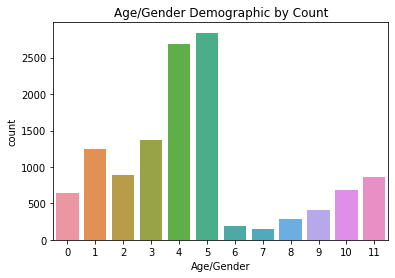

In [84]:
# Need to change font size of x and y axis
sns.countplot(master_df["num_group"])
plt.title("Age/Gender Demographic by Count")
plt.ylabel("count")
plt.xlabel("Age/Gender")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


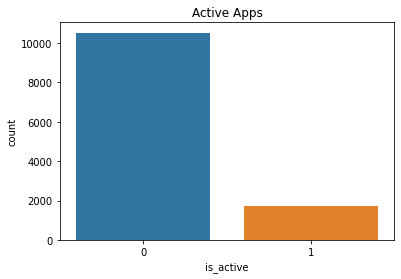

In [85]:
# It seems like most of the data is for non-active apps, however there are still a good amount of active apps.
sns.countplot(master_df["is_active"])
plt.title("Active Apps")
plt.show()


In [86]:
# Descriptive statistics.
master_df.describe()

,event_id,app_id,is_active,device_id,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal,num_group
count,1.223100e+04,1.223100e+04,12231.000000,1.223100e+04,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.00000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000
mean,2.521182e+05,1.530254e+18,0.139890,-3.754527e+17,0.177418,0.099501,0.042433,0.062546,0.027226,0.037037,0.048238,0.23931,0.162211,0.089690,0.005314,0.284359,0.060911,0.060911,0.748671,0.556128,0.021993,0.015534,0.059439,0.086093,0.011692,0.016761,0.012346,0.038509,0.008421,0.388603,0.036301,0.088545,0.025427,0.010302,0.099420,0.009075,0.274548,0.044150,0.012264,0.028534,0.014471,0.019949,0.066307,0.012182,0.010547,0.035320,0.092061,0.017006,0.009239,0.025427,0.008503,0.009075,0.012346,0.022729,0.008421,0.013163,0.033685,0.042760,0.015289,0.008503,0.034911,0.014063,0.016352,0.008176,0.087483,0.101872,0.019868,0.008339,0.013327,0.018559,0.012673,0.015943,0.010956,0.009402,0.010302,0.021666,0.008830,4.610089
std,3.137783e+05,5.294621e+18,0.346888,5.197392e+18,0.382038,0.299346,0.201584,0.242154,0.162748,0.188860,0.214278,0.42668,0.368659,0.285749,0.072709,0.451127,0.239176,0.239176,0.433795,0.496860,0.146667,0.123670,0.236454,0.280512,0.107498,0.128379,0.110428,0.192429,0.091384,0.487453,0.187046,0.284098,0.157425,0.100977,0.299237,0.094835,0.446305,0.205437,0.110066,0.166500,0.119429,0.139832,0.248828,0.109703,0.102160,0.184595,0.289124,0.129299,0.095678,0.157425,0.091823,0.094835,0.110428,0.149045,0.091384,0.113978,0.180424,0.202324,0.122705,0.091823,0.183563,0.117754,0.126830,0.090054,0.282553,0.302493,0.139551,0.090943,0.114675,0.134968,0.111862,0.125261,0.104099,0.096513,0.100977,0.145597,0.093556,2.969723
min,1.980000e+02,-9.208021e+18,0.000000,-9.170267e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc47f2fe90>,
      dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39030 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text

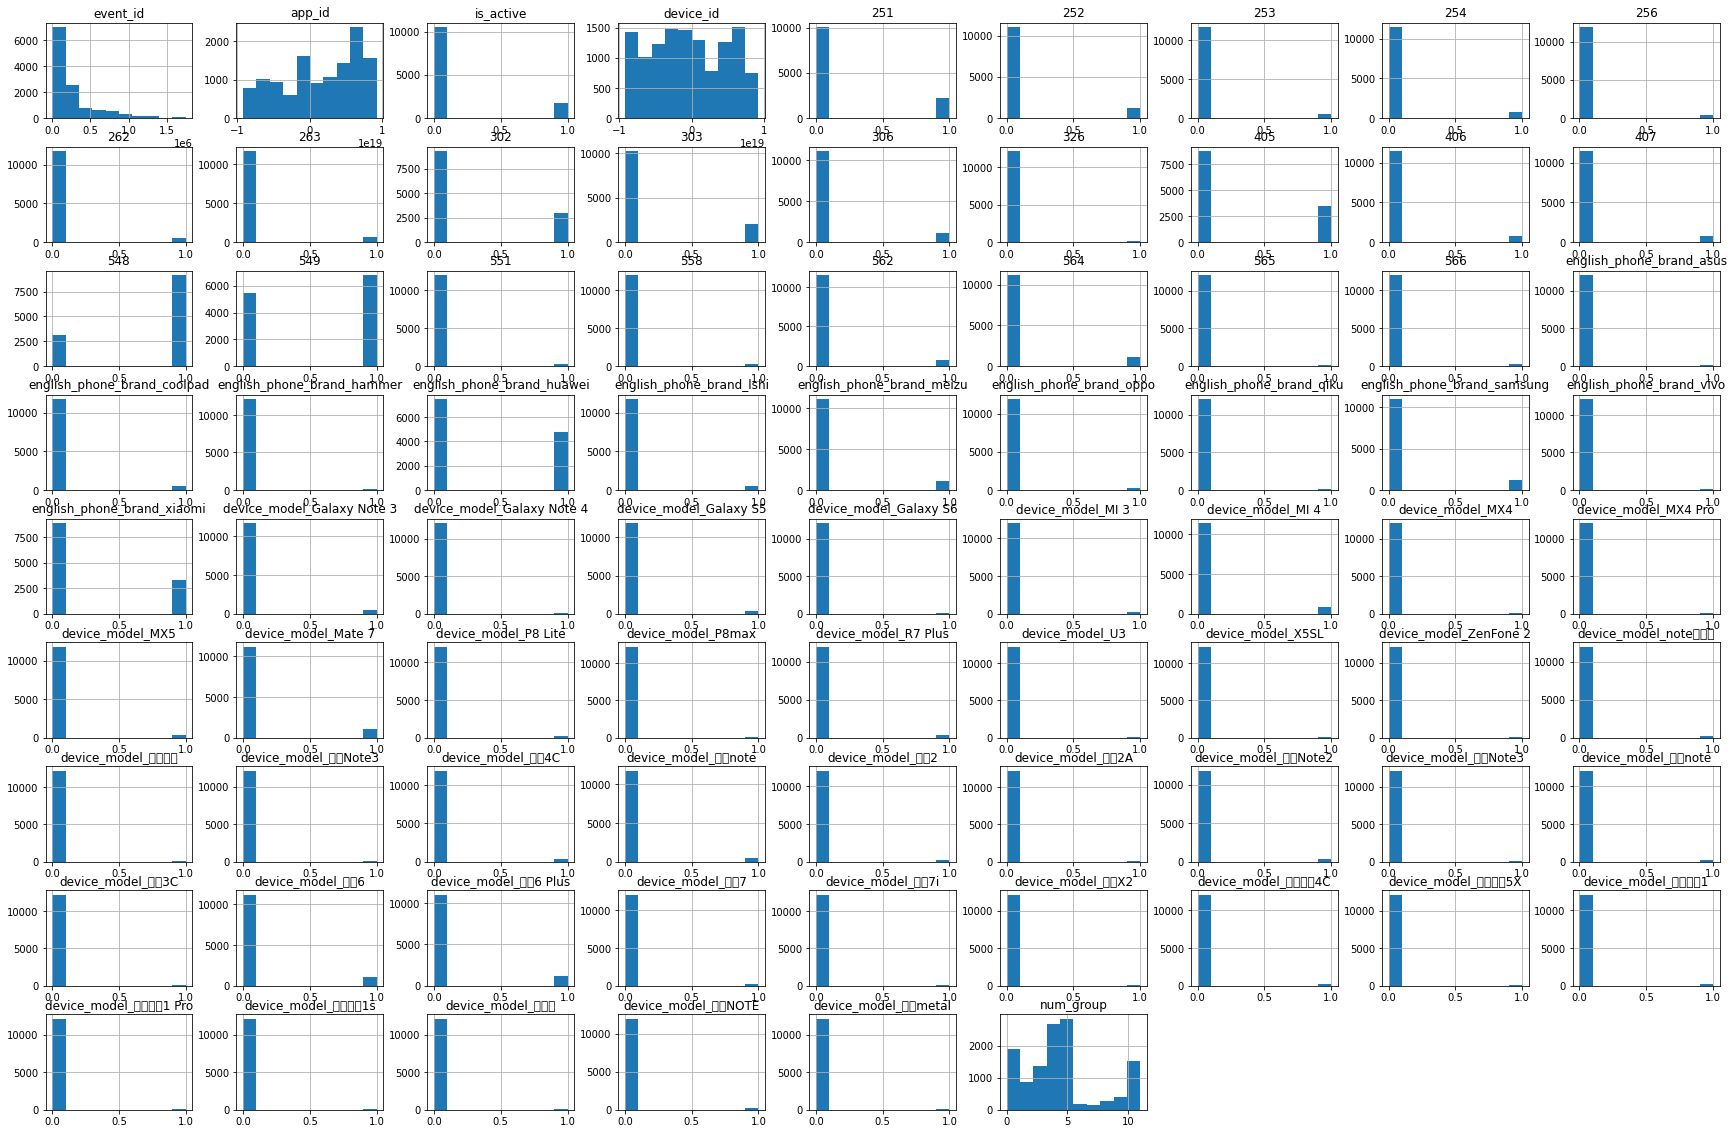

In [87]:
master_df.hist(figsize=(30,20))


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22362 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25163 missing from current font.
  font.set_

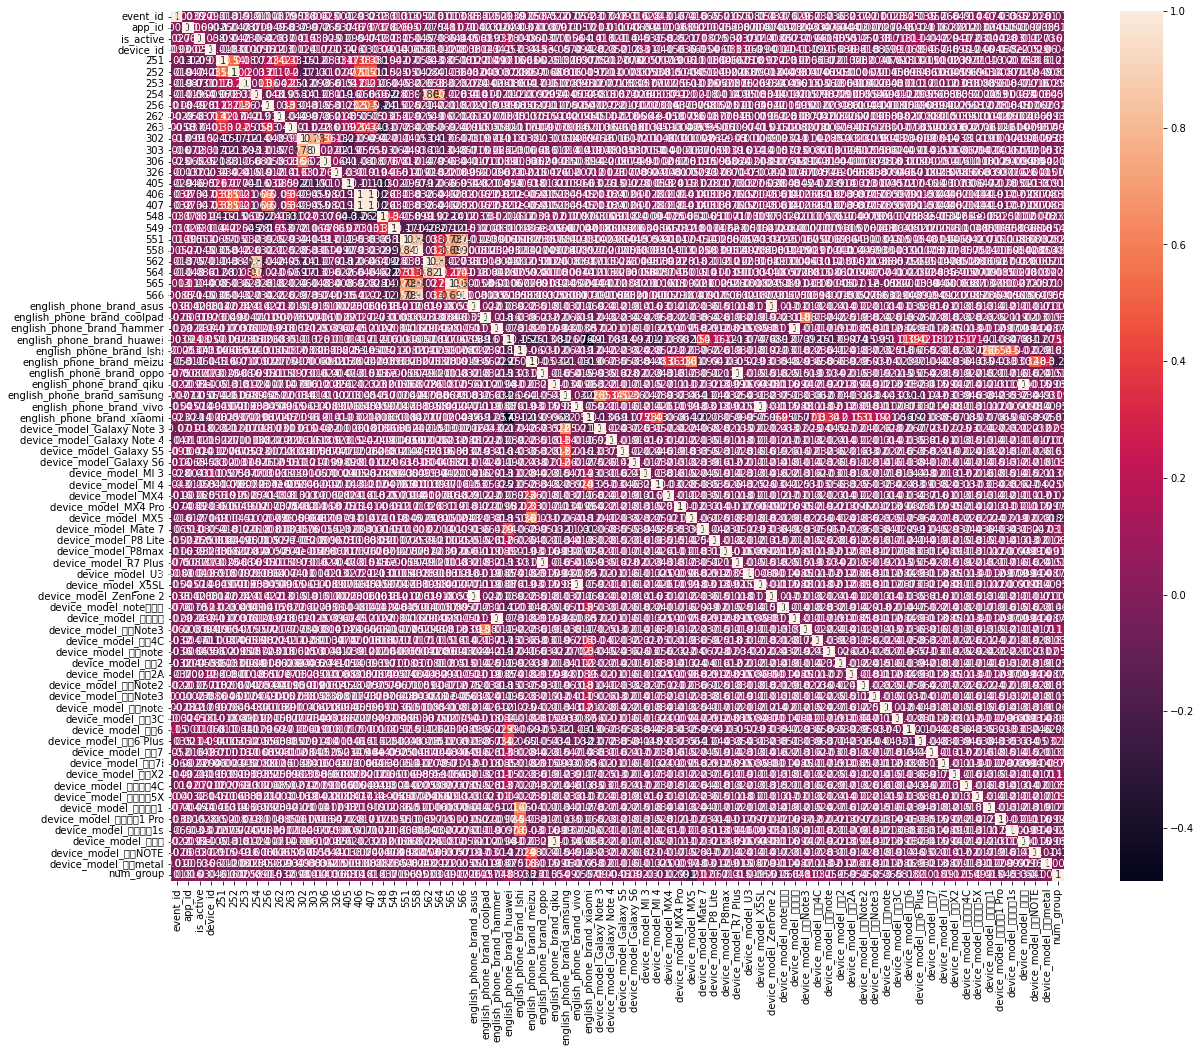


Correlation Table


,event_id,app_id,is_active,device_id,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal,num_group
event_id,1.000000,0.003890,0.027383,0.093235,-0.013147,-0.019143,-0.019222,-0.010805,-0.017645,0.002909,-0.005796,0.017965,0.006017,0.025282,-0.001006,-0.028615,-0.032310,-0.032310,0.032854,0.013035,0.012603,0.005204,-0.012538,-0.010587,0.012561,0.008540,0.032648,-0.025059,-0.028734,0.003859,-0.002470,-0.053082,0.075190,0.021646,-0.007676,-0.054413,0.022851,-0.070379,-0.047347,0.092745,0.016168,0.027857,0.042721,-0.015931,-0.074088,-0.015542,-0.064768,-0.052422,-0.015889,0.075190,0.008064,-0.054413,0.032648,0.075584,-0.028734,0.061650,-0.032490,-0.036367,-0.031874,-0.036615,0.021709,0.010244,-0.002291,0.003183,0.145264,-0.035237,0.051893,-0.065520,-0.049253,-0.013610,0.039645,0.074069,-0.033438,-0.064853,0.021646,-0.026299,0.009984,-0.017906
app_id,0.003890,1.000000,0.068823,-0.000251,-0.120075,-0.046696,-0.087097,-0.018939,0.004861,-0.058340,-0.036743,-0.099016,-0.071926,-0.065468,-0.037174,-0.045814,0.072798,0.072798,0.077762,0.025576,0.094908,0.069775,-0.075446,-0.048219,0.107613,0.070644,0.004202,-0.003129,0.002428,0.023737,-0.003742,-0.011401,-0.008700,-0.009710,0.011302,0.005671,-0.020723,0.010148,0.011021,-0.004162,0.006506,-0.003953,-0.011090,-0.001552,-0.008906,-0.011666,0.010614,0.002476,0.003896,-0.008700,-0.000396,0.005671,0.004202,-0.007824,0.002428,-0.003300,-0.004663,-0.006402,-0.004383,-0.002007,-0.001662,-0.000271,-0.012415,0.004491,0.001006,0.020773,-0.015602,-0.002733,0.002108,0.019725,0.003204,-0.004500,0.001476,-0.003005,-0.009710,-0.003268,0.005027,0.015556
is_active,0.027383,0.068823,1.000000,0.038487,-0.090428,-0.041928,-0.031107,-0.064260,-0.028364,-0.036657,-0.040190,0.015214,0.032901,-0.025126,-0.010027,-0.095377,-0.046535,-0.046535,0.030985,0.030583,-0.050834,-0.044942,-0.071476,-0.085966,-0.043864,-0.045310,-0.008802,0.018511,-0.037166,0.182352,-0.042987,-0.060983,0.003734,-0.010799,-0.005598,0.013601,-0.136131,0.017737,-0.021380,0.014409,-0.044922,-0.030567,-0.058212,-0.025448,-0.020872,-0.070783,0.080290,0.025345,-0.031553,0.003734,-0.011677,0.013601,-0.008802,-0.052015,-0.037166,-0.009353,-0.060926,-0.054946,0.005457,0.001159,-0.057442,-0.038156,0.016767,0.018351,0.101206,0.139247,-0.042216,-0.029208,-0.040703,0.072032,-0.030940,-0.043805,0.002841,-0.029521,-0.010799,0.027407,-0.035545,0.030252
device_id,0.093235,-0.000251,0.038487,1.000000,-0.017563,-0.030630,-0.001727,-0.009563,-0.012020,0.012951,-0.010166,0.023685,0.016800,0.021216,0.003366,-0.025588,-0.030211,-0.030211,0.039814,0.013764,0.000645,-0.003262,-0.010846,-0.011937,-0.008039,-0.003805,-0.001399,0.022847,0.041362,0.056785,-0.033809,-0.045023,0.131343,-0.000080,-0.074123,-0.093800,-0.028060,-0.022578,-0.051556,-0.011979,-0.082667,0.111582,-0.041093,-0.056142,-0.036113,-0.069268,-0.054364,-0.006141,-0.033450,0.131343,0.069081,-0.093800,-0.00

In [88]:
# Visualize correlation between independant variables and the target variable. Here, the target variable is 'Chance_of_Admit'
plt.figure(figsize=(20,16))
sns.heatmap(master_df.corr(),annot = True)
plt.show()

print()
print("Correlation Table")
# Correlation factors for 'delay time'.
master_df.corr()

Saving Cleaned Data as a New CSV


In [89]:
# When finished with cleaning, save it as a csv to use for future notebooks and save time
#master_df.to_csv("master_reduced_data.csv", index=False)


In [91]:
# Check to see if cleaned csv is in working directory
#!dir


app_events.csv
app_labels.csv
Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2021.csv
EDA.ipynb
events.csv
gender_age_test.csv
gender_age_train.csv
label_categories.csv
master_reduced_data.csv
phone_brand_device_model.csv
Proposal.ipynb
sample_submission.csv
